In [4]:
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

In [2]:
with open("word_data_file.obj", "rb") as infile:
    data = pickle.load(infile)

In [6]:
tags = []
for doc in data:
    for (word, tag, label) in doc:
        tags.append(tag)
df = pd.DataFrame(data=np.array(tags), columns=['POS'])
df.head()

,POS
0,Verbfin
1,Noun
2,Prep
3,Noun
4,Num


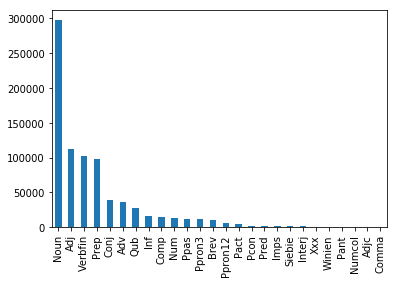

In [7]:
pd.value_counts(df['POS']).plot.bar()

In [18]:
pd.value_counts(df['POS'])

Noun       297197
Adj        112789
Verbfin    102583
Prep        97750
Conj        39709
Adv         36909
Qub         27431
Inf         16244
Comp        14861
Num         14002
Ppas        11990
Ppron3      11965
Brev         9986
Ppron12      6324
Pact         5086
Pcon         2372
Pred         2358
Imps         1951
Siebie       1812
Interj       1366
Xxx           737
Winien        698
Pant          150
Numcol        125
Adjc           76
Comma          44
Name: POS, dtype: int64

In [8]:
with open("tag_data.obj", "wb") as infile:
    pickle.dump(df, infile)

In [9]:
named_entities = []
for doc in data:
    for (word, tag, label) in doc:
        named_entities.append(label)
df_ne = pd.DataFrame(data=np.array(named_entities), columns=['NE'])
df_ne.head()

,NE
0,I
1,I
2,I
3,I
4,I


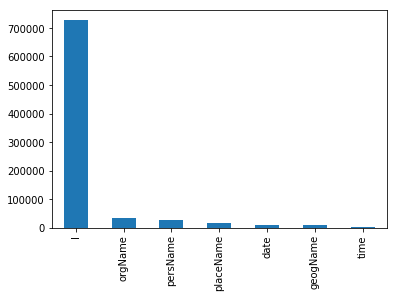

In [10]:
pd.value_counts(df_ne['NE']).plot.bar()

In [15]:
df_ne[df_ne['NE'] != 'I']['NE'].head()

45     persName
48    placeName
52     persName
54      orgName
57     geogName
Name: NE, dtype: object

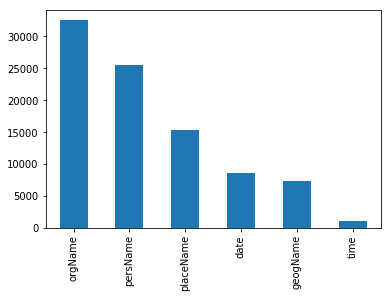

In [16]:
pd.value_counts(df_ne[df_ne['NE'] != 'I']['NE']).plot.bar()

In [17]:
pd.value_counts(df_ne[df_ne['NE'] != 'I']['NE'])

orgName      32479
persName     25419
placeName    15309
date          8551
geogName      7342
time          1014
Name: NE, dtype: int64

In [19]:
with open("ne_data.obj", "wb") as infile:
    pickle.dump(df_ne, infile)

In [20]:
df_concat = pd.concat([df, df_ne], axis=1)

In [21]:
df_concat.head()

,POS,NE
0,Verbfin,I
1,Noun,I
2,Prep,I
3,Noun,I
4,Num,I


In [22]:
len(df_concat)

816515